# Relax Inc. Data Science Challenge

## Objectives

With the given data, we need to find factors which predict future user adoption. An 'adopted user' is defined as someone who logged into the product at least three days within a seven day period.

## Imports and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [4]:
engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


From our data, we can see that our users table contains user information such as their name, email, etc.

The engagment table shows when the user visits the product and is already sorted for us by user which is nice.

We want to now log users as either adopted or not. We may have to convert our time_stamp column first in engagement.

In [5]:
engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [6]:
# convert to datetime
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [7]:
len(users)

12000

In [8]:
# loop through engagement table, filter by user. If user has < 3 visits, automatic no, if 3+ check to see within date range
adoptedList = []
for x in range(1, len(users)+1):
    # filter
    df = engagement[engagement['user_id'] == x]
    if len(df) < 3:
        adoptedList.append(0)
    else:
        # check difference between 1st and 3rd day
        adopted = False
        for y in range(len(df)-2):
            if abs(df.iloc[y+2]['time_stamp'] - df.iloc[y]['time_stamp']).days <= 7:
                adopted = True
                break
        if adopted == False:
            adoptedList.append(0)
        else:
            adoptedList.append(1)
# append list to users
users['adopted'] = adoptedList
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [9]:
len(users[users['adopted'] == 1])

1656

It seems we have 1656 adopted users within our database.

## Data Wrangling

Looking at how our data columns are labeled, we can drop some columns that will not be beneficial to finding out why a user is adopted or not. The creation and last session time are the key columns to look at. Looking at the last login time may not help us in our findings because it doesn't show the in between logins and after three visits, they are automatically defined as adopted. We can keep both columns for now to look at the month / day that these occurences happened, but for modeling, we will probably drop these columns.

Convert creation and last session time to datetime

In [10]:
users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted                         int64
dtype: object

In [11]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'],unit='s')
print(users.dtypes)
users.head()

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
adopted                                int64
dtype: object


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


We will save our creation_source dummy featuring for preprocessing.

We do want to however, drop the name and email column as well as create two seperate dataframes so we can look more into the adopted users. Names will not help and emails are a personal preference.

In [12]:
users = users.drop(columns=['name', 'email'])
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [13]:
# usersAdopted = users[users['adopted'] == 1]
# usersAdopted.head()

In [14]:
# usersRegular = users[users['adopted'] == 0]
# usersRegular.head()

## EDA

We can first take a look at most of our feature columns as a whole comparing them between each other.

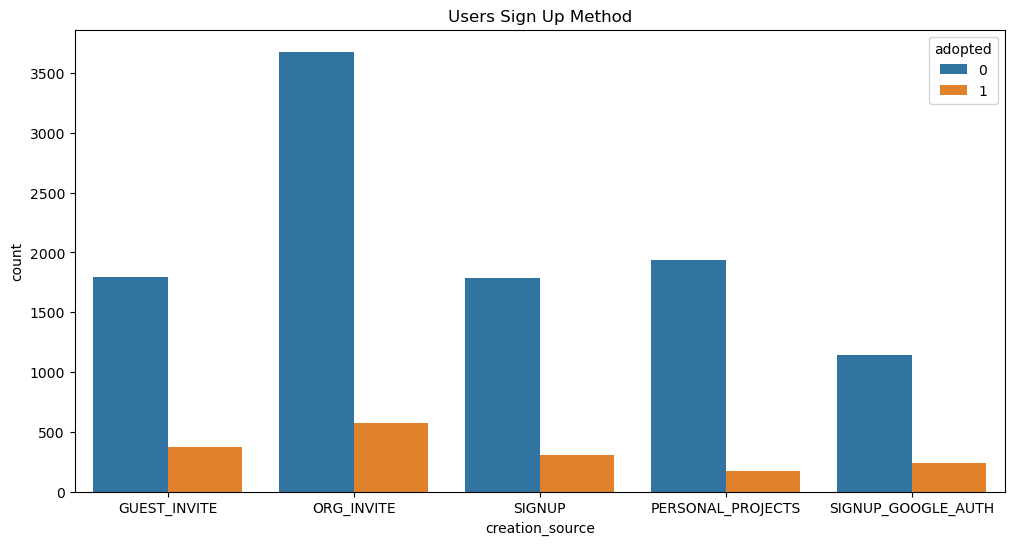

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='creation_source', data=users, hue='adopted')
plt.title('Users Sign Up Method')
plt.show()

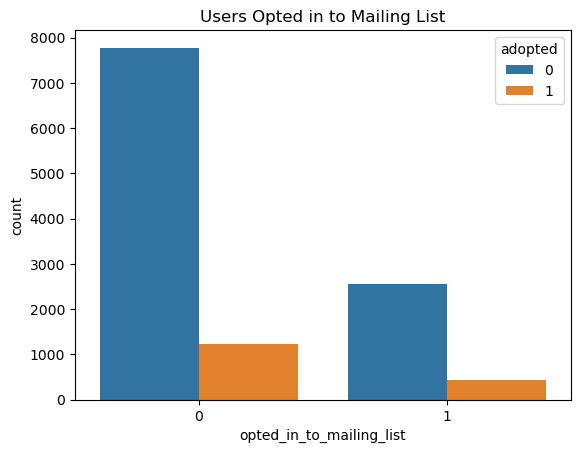

In [16]:
sns.countplot(x='opted_in_to_mailing_list', data=users, hue='adopted')
plt.title('Users Opted in to Mailing List')
plt.show()

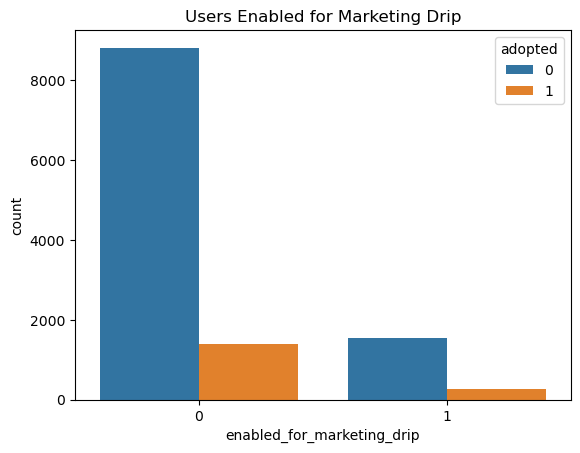

In [17]:
sns.countplot(x='enabled_for_marketing_drip', data=users, hue='adopted')
plt.title('Users Enabled for Marketing Drip')
plt.show()

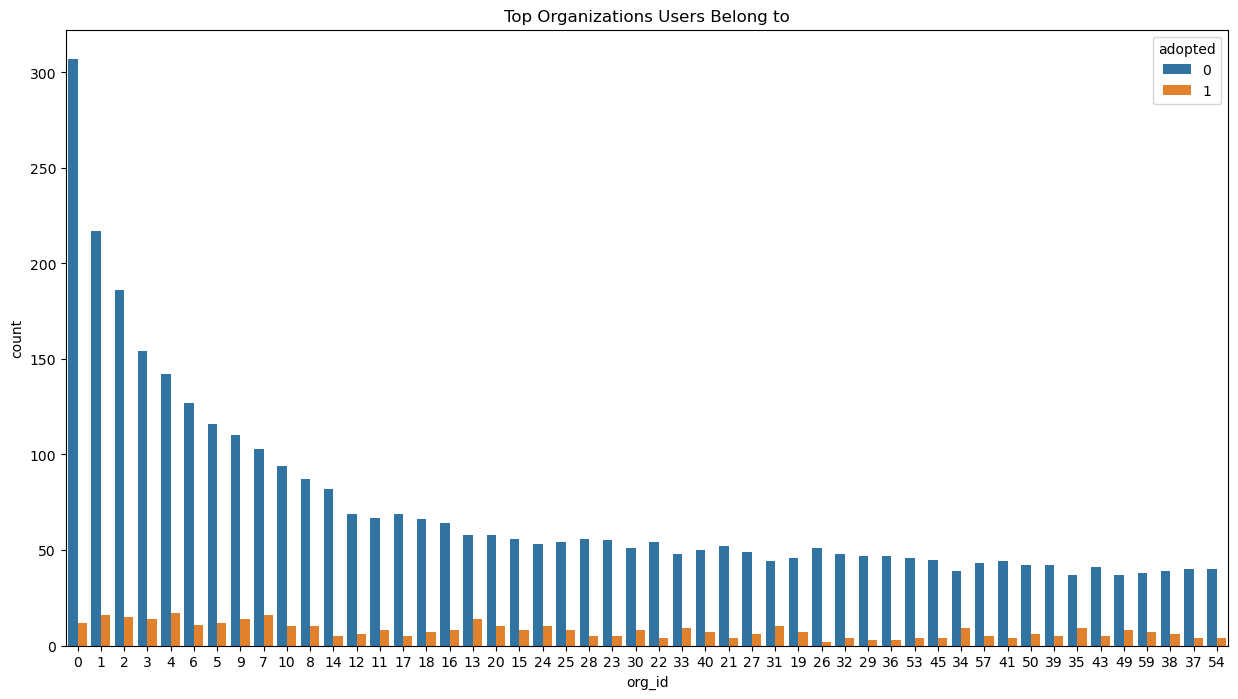

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='org_id', data=users, hue='adopted', order=users.org_id.value_counts().iloc[:50].index)
plt.title('Top Organizations Users Belong to')
plt.show()

Let's also generate what month and day of the week the user signed up on.

In [19]:
users['day'] = users['creation_time'].dt.dayofweek
users['month'] = users['creation_time'].dt.month
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,day,month
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1,4
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,4,11
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1,3
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1,5
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,3,1


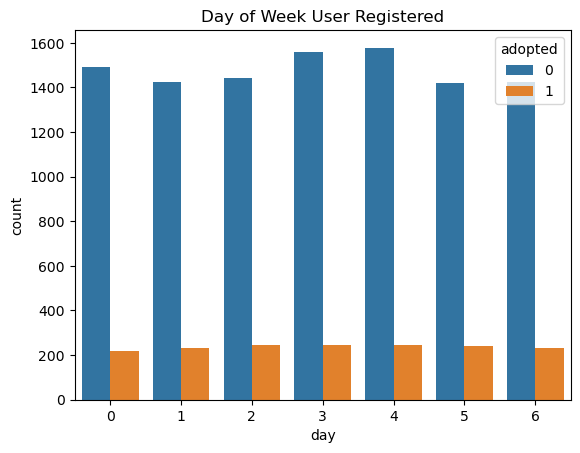

In [20]:
sns.countplot(x='day', data=users, hue='adopted')
plt.title('Day of Week User Registered')
plt.show()

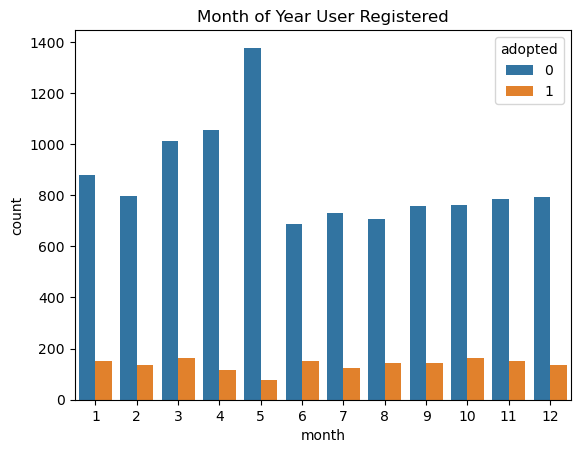

In [21]:
sns.countplot(x='month', data=users, hue='adopted')
plt.title('Month of Year User Registered')
plt.show()

It's not clear to see which factors heavily influence what makes a user adopted through EDA.

## Preprocess and Modeling

We will create a Random Forest Classifier Model as well as a Gradient Booster Classifier to best yield our desired results.

We need to first setup our dataframe as well as create train and test splits.

In [22]:
users['creation_source'].replace(['PERSONAL_PROJECTS', 'GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH'], [0, 1, 2, 3, 4], inplace=True)
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,day,month
0,1,2014-04-22 03:53:30,1,2014-04-22 03:53:30,1,0,11,10803.0,0,1,4
1,2,2013-11-15 03:45:04,2,2014-03-31 03:45:04,0,0,1,316.0,1,4,11
2,3,2013-03-19 23:14:52,2,2013-03-19 23:14:52,0,0,94,1525.0,0,1,3
3,4,2013-05-21 08:09:28,1,2013-05-22 08:09:28,0,0,1,5151.0,0,1,5
4,5,2013-01-17 10:14:20,1,2013-01-22 10:14:20,0,0,193,5240.0,0,3,1


In [23]:
from sklearn.model_selection import train_test_split

data = users.drop(columns=['object_id', 'creation_time', 'last_session_creation_time', 'invited_by_user_id', 'adopted'], axis=1)
labels = users['adopted']
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

#train and test classifiers

# rf
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print('Random Forest Classifier score: ' + str(rf.score(X_test, y_test)))

# gbc
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
 
# Predict on test set
pred_y = gbc.predict(X_test)
 
# accuracy
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Random Forest Classifier score: 0.8295833333333333
Gradient Boosting Classifier accuracy is : 0.86


Let's try and boost our Random Forest Classifier.

In [25]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_) 

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)


In [26]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5)

rf.fit(X_train, y_train)

print('Random Forest Classifier score: ' + str(rf.score(X_test, y_test)))

Random Forest Classifier score: 0.8591666666666666


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

#print out classification report and confusion matrix
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2063
           1       0.33      0.00      0.01       337

    accuracy                           0.86      2400
   macro avg       0.60      0.50      0.47      2400
weighted avg       0.79      0.86      0.80      2400

confusion matrix:
[[2061    2]
 [ 336    1]]


Let's now display the features that seem to most influence our models.

In [29]:
# RF
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(data.columns)
feature_importance.coef.nlargest(10)

org_id                        0.510265
month                         0.187049
day                           0.153560
creation_source               0.104790
opted_in_to_mailing_list      0.026050
enabled_for_marketing_drip    0.018286
Name: coef, dtype: float64

In [30]:
# GBC
feature_importance = pd.DataFrame()
feature_importance['coef'] = gbc.feature_importances_
feature_importance = feature_importance.set_index(data.columns)
feature_importance.coef.nlargest(10)

org_id                        0.415568
month                         0.327302
creation_source               0.170294
day                           0.063642
enabled_for_marketing_drip    0.015017
opted_in_to_mailing_list      0.008177
Name: coef, dtype: float64

While our model does not perform the best (.86 recall at best), we can see that the organization_id seems to be the most beneficial with the month of the year the user signed up with to be the largest factors in whether or not a user may be adopted or not.